In [1]:
import itertools

In [2]:
def greedy(items, capacity):
    """
    Giải bài toán Knapsack bằng phương pháp tham lam.
    Args:
        items: Danh sách các vật phẩm, mỗi vật phẩm là dict {"weight": w, "value": v}.
        capacity: Dung lượng túi.
    Returns:
        tuple: (tổng giá trị tối đa, danh sách chỉ số vật phẩm được chọn).
    """
    sorted_items = sorted(
        [(item["value"], item["weight"], i) for i, item in enumerate(items)],
        key=lambda x: x[0] / x[1],  # Sắp xếp theo tỷ lệ value/weight
        reverse=True
    )
    current_weight = 0
    current_value = 0
    selected_items = []
    
    for value, weight, index in sorted_items:
        if current_weight + weight <= capacity:
            current_weight += weight
            current_value += value
            selected_items.append(index)
    
    return current_value, selected_items

In [3]:
def brute_force(items, capacity):
    """
    Giải bài toán Knapsack bằng phương pháp vét cạn.
    Args:
        items: Danh sách các vật phẩm, mỗi vật phẩm là dict {"weight": w, "value": v}.
        capacity: Dung lượng túi.
    Returns:
        tuple: (tổng giá trị tối đa, danh sách chỉ số vật phẩm được chọn).
    """
    n = len(items)
    max_value = 0
    best_items = []
    
    for r in range(n + 1):
        for subset in itertools.combinations(range(n), r):
            total_weight = sum(items[i]["weight"] for i in subset)
            total_value = sum(items[i]["value"] for i in subset)
            if total_weight <= capacity and total_value > max_value:
                max_value = total_value
                best_items = list(subset)
    
    return max_value, best_items

In [4]:
def branch_and_bound(items, capacity):
    """
    Giải bài toán Knapsack bằng phương pháp nhánh cận sử dụng hàng đợi.
    Args:
        items: Danh sách các vật phẩm, mỗi vật phẩm là dict {"weight": w, "value": v}.
        capacity: Dung lượng túi.
    Returns:
        tuple: (tổng giá trị tối đa, danh sách chỉ số vật phẩm được chọn).
    """
    # Sắp xếp vật phẩm theo tỷ lệ value/weight giảm dần
    sorted_items = sorted(
        [(item["value"], item["weight"], i) for i, item in enumerate(items)],
        key=lambda x: x[0] / x[1],
        reverse=True
    )

    # Hàm tính cận trên
    def _get_upper_bound(index, current_weight, current_value):
        bound = current_value
        weight = current_weight
        for i in range(index + 1, len(sorted_items)):
            if weight + sorted_items[i][1] <= capacity:
                weight += sorted_items[i][1]
                bound += sorted_items[i][0]
            else:
                remaining = capacity - weight
                bound += sorted_items[i][0] * remaining / sorted_items[i][1]
                break
        return bound

    # Khởi tạo biến kết quả
    best_value = 0
    best_items = []

    # Khởi tạo hàng đợi
    queue = [{
        "index": -1,
        "value": 0,
        "weight": 0,
        "items": []
    }]

    # Xử lý hàng đợi
    while queue:
        node = queue.pop(0)  # Lấy nút đầu tiên
        index = node["index"] + 1

        if index >= len(sorted_items):
            continue

        # Tính cận trên cho nút hiện tại
        bound = _get_upper_bound(node["index"], node["weight"], node["value"])

        # Cắt tỉa nếu cận trên không hứa hẹn
        if bound <= best_value:
            continue

        # Thêm nhánh không chọn vật phẩm hiện tại
        queue.append({
            "index": index,
            "value": node["value"],
            "weight": node["weight"],
            "items": node["items"].copy()
        })

        # Thêm nhánh chọn vật phẩm hiện tại nếu khả thi
        if node["weight"] + sorted_items[index][1] <= capacity:
            new_value = node["value"] + sorted_items[index][0]
            new_weight = node["weight"] + sorted_items[index][1]
            new_items = node["items"] + [sorted_items[index][2]]

            if new_value > best_value:
                best_value = new_value
                best_items = new_items.copy()

            queue.append({
                "index": index,
                "value": new_value,
                "weight": new_weight,
                "items": new_items
            })

    return best_value, best_items

In [6]:
def recursive_knapsack(items, capacity):
    """
    Giải bài toán Knapsack bằng phương pháp đệ quy.
    Args:
        items: Danh sách các vật phẩm, mỗi vật phẩm là dict {"weight": w, "value": v}.
        capacity: Dung lượng túi.
    Returns:
        tuple: (tổng giá trị tối đa, danh sách chỉ số vật phẩm được chọn).
    """
    def knap(n, cap):
        if n == 0 or cap == 0:
            return 0, []
        if items[n-1]["weight"] > cap:
            return knap(n-1, cap)
        else:
            val1, items1 = knap(n-1, cap)
            val2, items2 = knap(n-1, cap - items[n-1]["weight"])
            val2 += items[n-1]["value"]
            items2 = items2 + [n-1]
            if val1 > val2:
                return val1, items1
            else:
                return val2, items2
    
    max_value, selected_items = knap(len(items), capacity)
    return max_value, selected_items



In [7]:
def dynamic_programming(items, capacity):
    n = len(items)
    # Tạo bảng dp với kích thước (n+1) x (capacity+1)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    
    # Tạo bảng keep để theo dõi vật phẩm được chọn
    keep = [[False for _ in range(capacity + 1)] for _ in range(n + 1)]
    
    # Điền bảng dp và keep
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            # Không chọn vật phẩm i-1
            dp[i][w] = dp[i-1][w]
            # Kiểm tra trọng lượng của vật phẩm i-1
            if items[i-1]["weight"] <= w:
                # So sánh khi chọn và không chọn vật phẩm i-1
                if dp[i-1][w - items[i-1]["weight"]] + items[i-1]["value"] > dp[i][w]:
                    dp[i][w] = dp[i-1][w - items[i-1]["weight"]] + items[i-1]["value"]
                    keep[i][w] = True
    
    # Tìm các vật phẩm được chọn
    selected_items = []
    w = capacity
    for i in range(n, 0, -1):
        if keep[i][w]:
            selected_items.append(i-1)  # Lưu chỉ số của vật phẩm
            w -= items[i-1]["weight"]  # Giảm dung lượng còn lại
    
    # Trả về giá trị tối đa và danh sách chỉ số các vật phẩm được chọn
    return dp[n][capacity], selected_items

In [ ]:
def main():
    print("Nhập số lượng vật phẩm:")
    n = int(input())
    items = []
    print("Nhập trọng lượng và giá trị cho từng vật phẩm (trọng_lượng giá_trị):")
    for i in range(n):
        weight, value = map(int, input(f"Vật phẩm {i+1}: ").split())
        items.append({"weight": weight, "value": value})
    
    print("Nhập dung lượng túi:")
    capacity = int(input())
    
    # In danh sách vật phẩm vừa nhập
    print("\nDanh sách vật phẩm vừa nhập:")
    for i, item in enumerate(items):
        print(f"Vật phẩm {i+1}: trọng_lượng={item['weight']}, giá_trị={item['value']}")
    
    # Kiểm tra input
    if n <= 0 or capacity < 0:
        print("Dữ liệu không hợp lệ!")
        return
    for i, item in enumerate(items):
        if item["value"] < 0 or item["weight"] <= 0:
            print(f"Vật phẩm {i+1} có giá trị hoặc trọng lượng không hợp lệ!")
            return
    
    methods = [
        ("Tham lam (Greedy)", greedy),
        ("Vét cạn (Brute Force)", brute_force),
        ("Nhánh cận (Branch and Bound)", branch_and_bound),
        ("Đệ quy (Recursive)", recursive_knapsack),
        ("Quy hoạch động (Dynamic Programming)", dynamic_programming)
    ]
    
    print("\nKết quả từ các phương pháp:")
    for name, method in methods:
        max_value, selected_items = method(items, capacity)
        selected_items = sorted(selected_items) 
        print(f"\nPhương pháp {name}:")
        print(f"Tổng giá trị tối đa: {max_value}")
        print(f"Vật phẩm được chọn: {[i+1 for i in selected_items]}")
        details = [f"Vật phẩm {i+1}: trọng_lượng={items[i]['weight']}, giá_trị={items[i]['value']}" for i in selected_items]
        print(f"Chi tiết: {details}")

if __name__ == "__main__":
    main()

Nhập số lượng vật phẩm:
Nhập trọng lượng và giá trị cho từng vật phẩm (trọng_lượng giá_trị):
Nhập dung lượng túi:

Danh sách vật phẩm vừa nhập:
Vật phẩm 1: trọng_lượng=10, giá_trị=60
Vật phẩm 2: trọng_lượng=20, giá_trị=100
Vật phẩm 3: trọng_lượng=30, giá_trị=120

Kết quả từ các phương pháp:

Phương pháp Tham lam (Greedy):
Tổng giá trị tối đa: 160
Vật phẩm được chọn: [1, 2]
Chi tiết: ['Vật phẩm 1: trọng_lượng=10, giá_trị=60', 'Vật phẩm 2: trọng_lượng=20, giá_trị=100']

Phương pháp Vét cạn (Brute Force):
Tổng giá trị tối đa: 220
Vật phẩm được chọn: [2, 3]
Chi tiết: ['Vật phẩm 2: trọng_lượng=20, giá_trị=100', 'Vật phẩm 3: trọng_lượng=30, giá_trị=120']

Phương pháp Nhánh cận (Branch and Bound):
Tổng giá trị tối đa: 220
Vật phẩm được chọn: [2, 3]
Chi tiết: ['Vật phẩm 2: trọng_lượng=20, giá_trị=100', 'Vật phẩm 3: trọng_lượng=30, giá_trị=120']

Phương pháp Đệ quy (Recursive):
Tổng giá trị tối đa: 220
Vật phẩm được chọn: [2, 3]
Chi tiết: ['Vật phẩm 2: trọng_lượng=20, giá_trị=100', 'Vật phẩm 3:

In [8]:
import random
import time
import matplotlib.pyplot as plt
import itertools

In [9]:
# Hàm tạo dữ liệu ngẫu nhiên
def generate_random_input(n):
    items = [{"weight": random.randint(1, 100), "value": random.randint(1, 100)} for _ in range(n)]
    max_weight = sum(item["weight"] for item in items)
    capacity = random.randint(max_weight // 2, max_weight)  # Dung lượng túi từ 50% đến 100% tổng trọng lượng
    return items, capacity

In [10]:
# Hàm đo thời gian chạy của các thuật toán
def measure_execution_times(max_n):
    methods = [
        ("Greedy", greedy),
        ("Brute Force", brute_force),
        ("Branch and Bound", branch_and_bound),
        ("Recursive", recursive_knapsack),
        ("Dynamic Programming", dynamic_programming)
    ]
    
    times = {name: [] for name, _ in methods}
    n_values = list(range(1, max_n + 1))
    
    for n in n_values:
        # Tạo dữ liệu ngẫu nhiên
        items, capacity = generate_random_input(n)
        
        for name, method in methods:
            start_time = time.perf_counter()
            method(items, capacity)
            end_time = time.perf_counter()
            times[name].append(end_time - start_time)
    
    return n_values, times

In [11]:
# Hàm vẽ biểu đồ
def plot_performance(n_values, times):
    plt.figure(figsize=(10, 6))
    for name, time_list in times.items():
        plt.plot(n_values, time_list, label=name, marker='o')
    
    plt.xlabel('Số lượng vật phẩm (n)')
    plt.ylabel('Thời gian thực thi (giây)')
    plt.title('So sánh thời gian thực thi của các thuật toán Knapsack')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')  # Sử dụng thang log cho trục y do sự khác biệt lớn về thời gian
    plt.savefig('knapsack_performance.png')

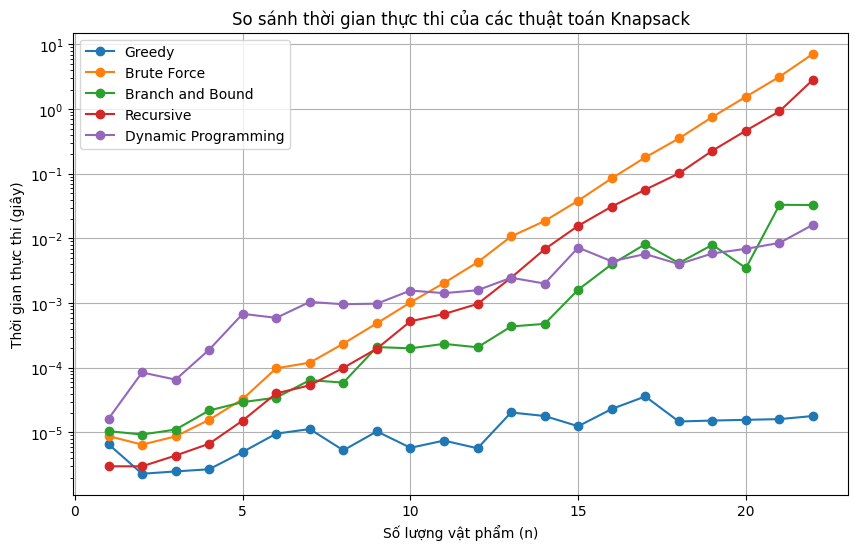

In [14]:
max_n = 22
n_values, times = measure_execution_times(max_n)
plot_performance(n_values, times)